In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("../data/raw/heart_2020.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [27]:
# Check null values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [28]:
# Check unique values
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [29]:
categorical_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
                       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

print(df[categorical_columns].apply(lambda col: col.unique()))

HeartDisease                                                [No, Yes]
Smoking                                                     [Yes, No]
AlcoholDrinking                                             [No, Yes]
Stroke                                                      [No, Yes]
DiffWalking                                                 [No, Yes]
Sex                                                    [Female, Male]
AgeCategory         [55-59, 80 or older, 65-69, 75-79, 40-44, 70-7...
Race                [White, Black, Asian, American Indian/Alaskan ...
Diabetic            [Yes, No, No, borderline diabetes, Yes (during...
PhysicalActivity                                            [Yes, No]
GenHealth                    [Very good, Fair, Good, Poor, Excellent]
Asthma                                                      [Yes, No]
KidneyDisease                                               [No, Yes]
SkinCancer                                                  [Yes, No]
dtype: object


In [30]:
df['Race'] = df['Race'].replace(['American Indian/Alaskan Native'], 'American_indian_Alaskan_native')

In [31]:
# List of columns to encode
columns_to_onehot = ['Sex', 'Race']
columns_to_binary = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [32]:
df = pd.get_dummies(df, columns=columns_to_onehot, dtype=int)

value_mapping = {'No': 0, 'Yes': 1}
for column in columns_to_binary:
    df[column] = df[column].replace(value_mapping)

diabetic_value_mapping = {'No': 0, 'No, borderline diabetes' : 1, 'Yes' : 2, 'Yes (during pregnancy)' : 3}
df['Diabetic'] = df['Diabetic'].replace(diabetic_value_mapping)

genHealth_mapping = {'Poor': 0, 'Fair' : 1, 'Good' : 2, 'Very good' : 3, 'Excellent' : 4}
df['GenHealth'] = df['GenHealth'].replace(genHealth_mapping)

age_mapping = {
        '18-24': 21,
        '25-29': 27,
        '30-34': 32,
        '35-39': 37,
        '40-44': 42,
        '45-49': 47,
        '50-54': 52,
        '55-59': 57,
        '60-64': 62,
        '65-69': 67,
        '70-74': 72,
        '75-79': 77,
        '80 or older': 85 
        }
df['AgeCategory'] = df['AgeCategory'].replace(age_mapping)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  object 
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   AgeCategory                          319795 non-null  int64  
 9   Diabetic                             319795 non-null  int64  
 10  PhysicalActivity                     319795 non-null  int64  
 11  GenHealth    

In [34]:
print(df.apply(lambda col: col.unique()))

HeartDisease                                                                   [No, Yes]
BMI                                    [16.6, 20.34, 26.58, 24.21, 23.71, 28.87, 21.6...
Smoking                                                                           [1, 0]
AlcoholDrinking                                                                   [0, 1]
Stroke                                                                            [0, 1]
PhysicalHealth                         [3.0, 0.0, 20.0, 28.0, 6.0, 15.0, 5.0, 30.0, 7...
MentalHealth                           [30.0, 0.0, 2.0, 5.0, 15.0, 8.0, 4.0, 3.0, 10....
DiffWalking                                                                       [0, 1]
AgeCategory                            [57, 85, 67, 77, 42, 72, 62, 52, 47, 21, 37, 3...
Diabetic                                                                    [2, 0, 1, 3]
PhysicalActivity                                                                  [1, 0]
GenHealth            

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'AlcoholDrinking'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'DiffWalking'}>,
        <Axes: title={'center': 'AgeCategory'}>,
        <Axes: title={'center': 'Diabetic'}>,
        <Axes: title={'center': 'PhysicalActivity'}>],
       [<Axes: title={'center': 'GenHealth'}>,
        <Axes: title={'center': 'SleepTime'}>,
        <Axes: title={'center': 'Asthma'}>,
        <Axes: title={'center': 'KidneyDisease'}>,
        <Axes: title={'center': 'SkinCancer'}>],
       [<Axes: title={'center': 'Sex_Female'}>,
        <Axes: title={'center': 'Sex_Male'}>,
        <Axes: title={'center': 'Race_American_indian_Alaskan_native'}>,
        <Axes: title={'center': 'Race_Asian'}>,
        <Axes: title={'center': 'Race_Black'}>],
       [<Axes

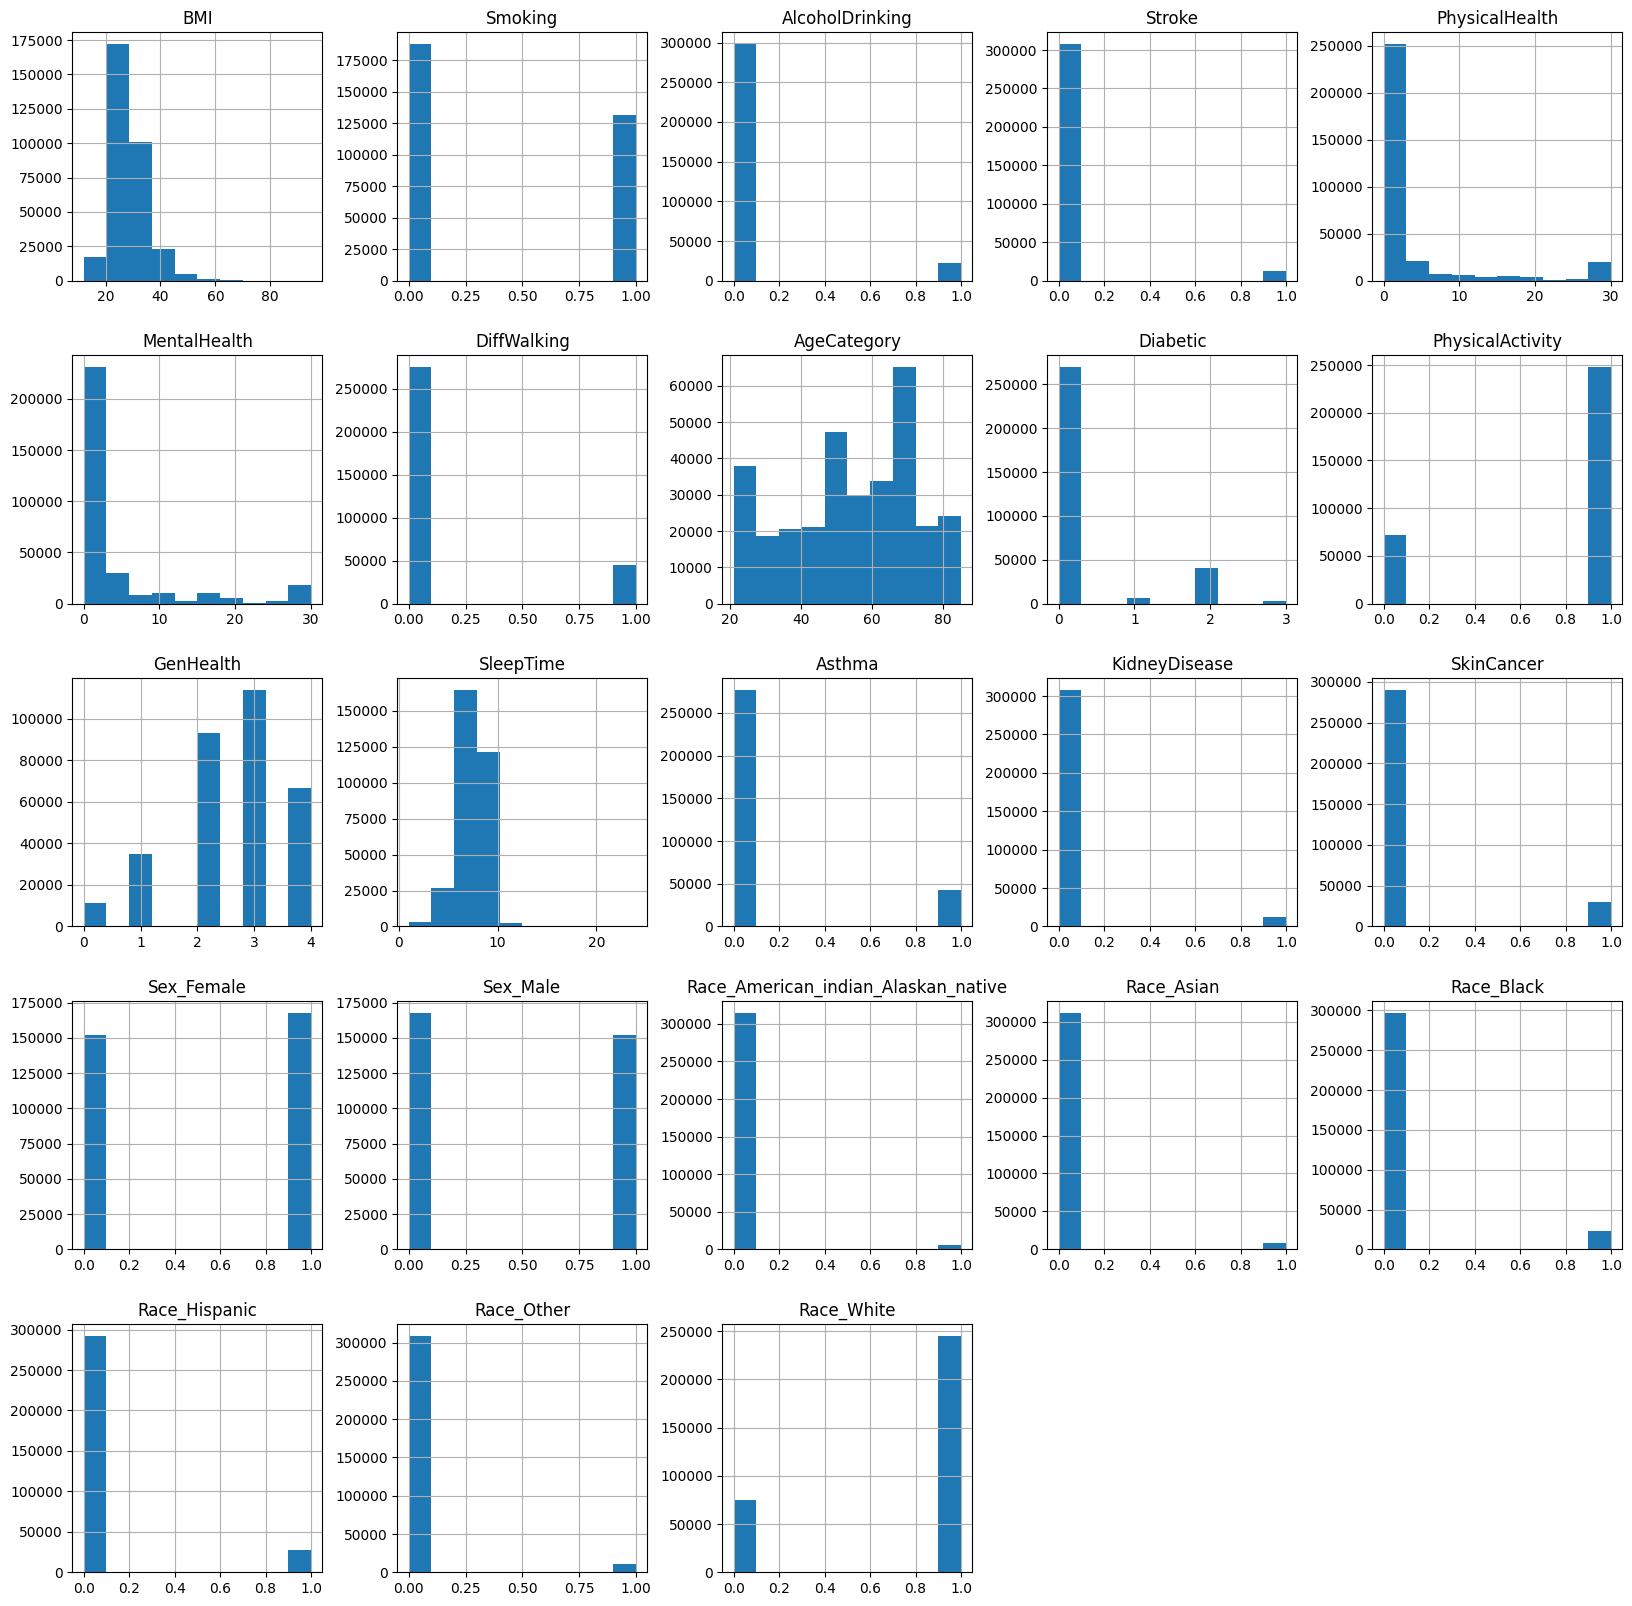

In [35]:
df.hist(figsize=(20, 20))

(319795, 24)


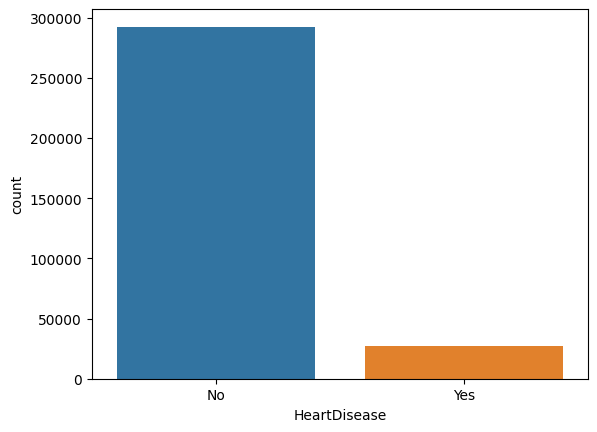

In [36]:
sns.countplot(x=df['HeartDisease'])
print(df.shape)

## Remove Outliers and Balance

In [37]:
numerical_columns = ['BMI','SleepTime']

z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

In [38]:
from sklearn.utils import resample

df_majority = df_no_outliers[df_no_outliers['HeartDisease'] == 'No']
df_minority = df_no_outliers[df_no_outliers['HeartDisease'] == 'Yes']

minority_size = len(df_minority)
df_majority_downsampled = resample(df_majority, replace=False, n_samples=minority_size, random_state=42)
df_balanced = pd.concat([df_majority_downsampled, df_minority])

df_balanced = df_balanced.sample(frac=1, random_state=42)

(52296, 24)


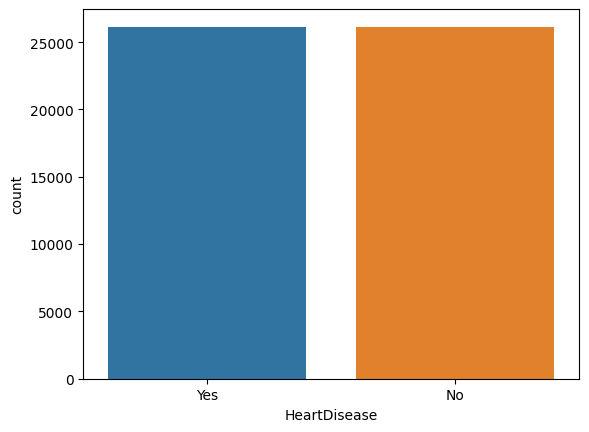

In [39]:
sns.countplot(x=df_balanced['HeartDisease'])
print(df_balanced.shape)

## Normalize

In [40]:
from sklearn.preprocessing import MinMaxScaler

heart_disease = df_balanced['HeartDisease']
data = df_balanced.drop('HeartDisease', axis=1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

df_normalized = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
df_normalized['HeartDisease'] = heart_disease

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'AlcoholDrinking'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'DiffWalking'}>,
        <Axes: title={'center': 'AgeCategory'}>,
        <Axes: title={'center': 'Diabetic'}>,
        <Axes: title={'center': 'PhysicalActivity'}>],
       [<Axes: title={'center': 'GenHealth'}>,
        <Axes: title={'center': 'SleepTime'}>,
        <Axes: title={'center': 'Asthma'}>,
        <Axes: title={'center': 'KidneyDisease'}>,
        <Axes: title={'center': 'SkinCancer'}>],
       [<Axes: title={'center': 'Sex_Female'}>,
        <Axes: title={'center': 'Sex_Male'}>,
        <Axes: title={'center': 'Race_American_indian_Alaskan_native'}>,
        <Axes: title={'center': 'Race_Asian'}>,
        <Axes: title={'center': 'Race_Black'}>],
       [<Axes

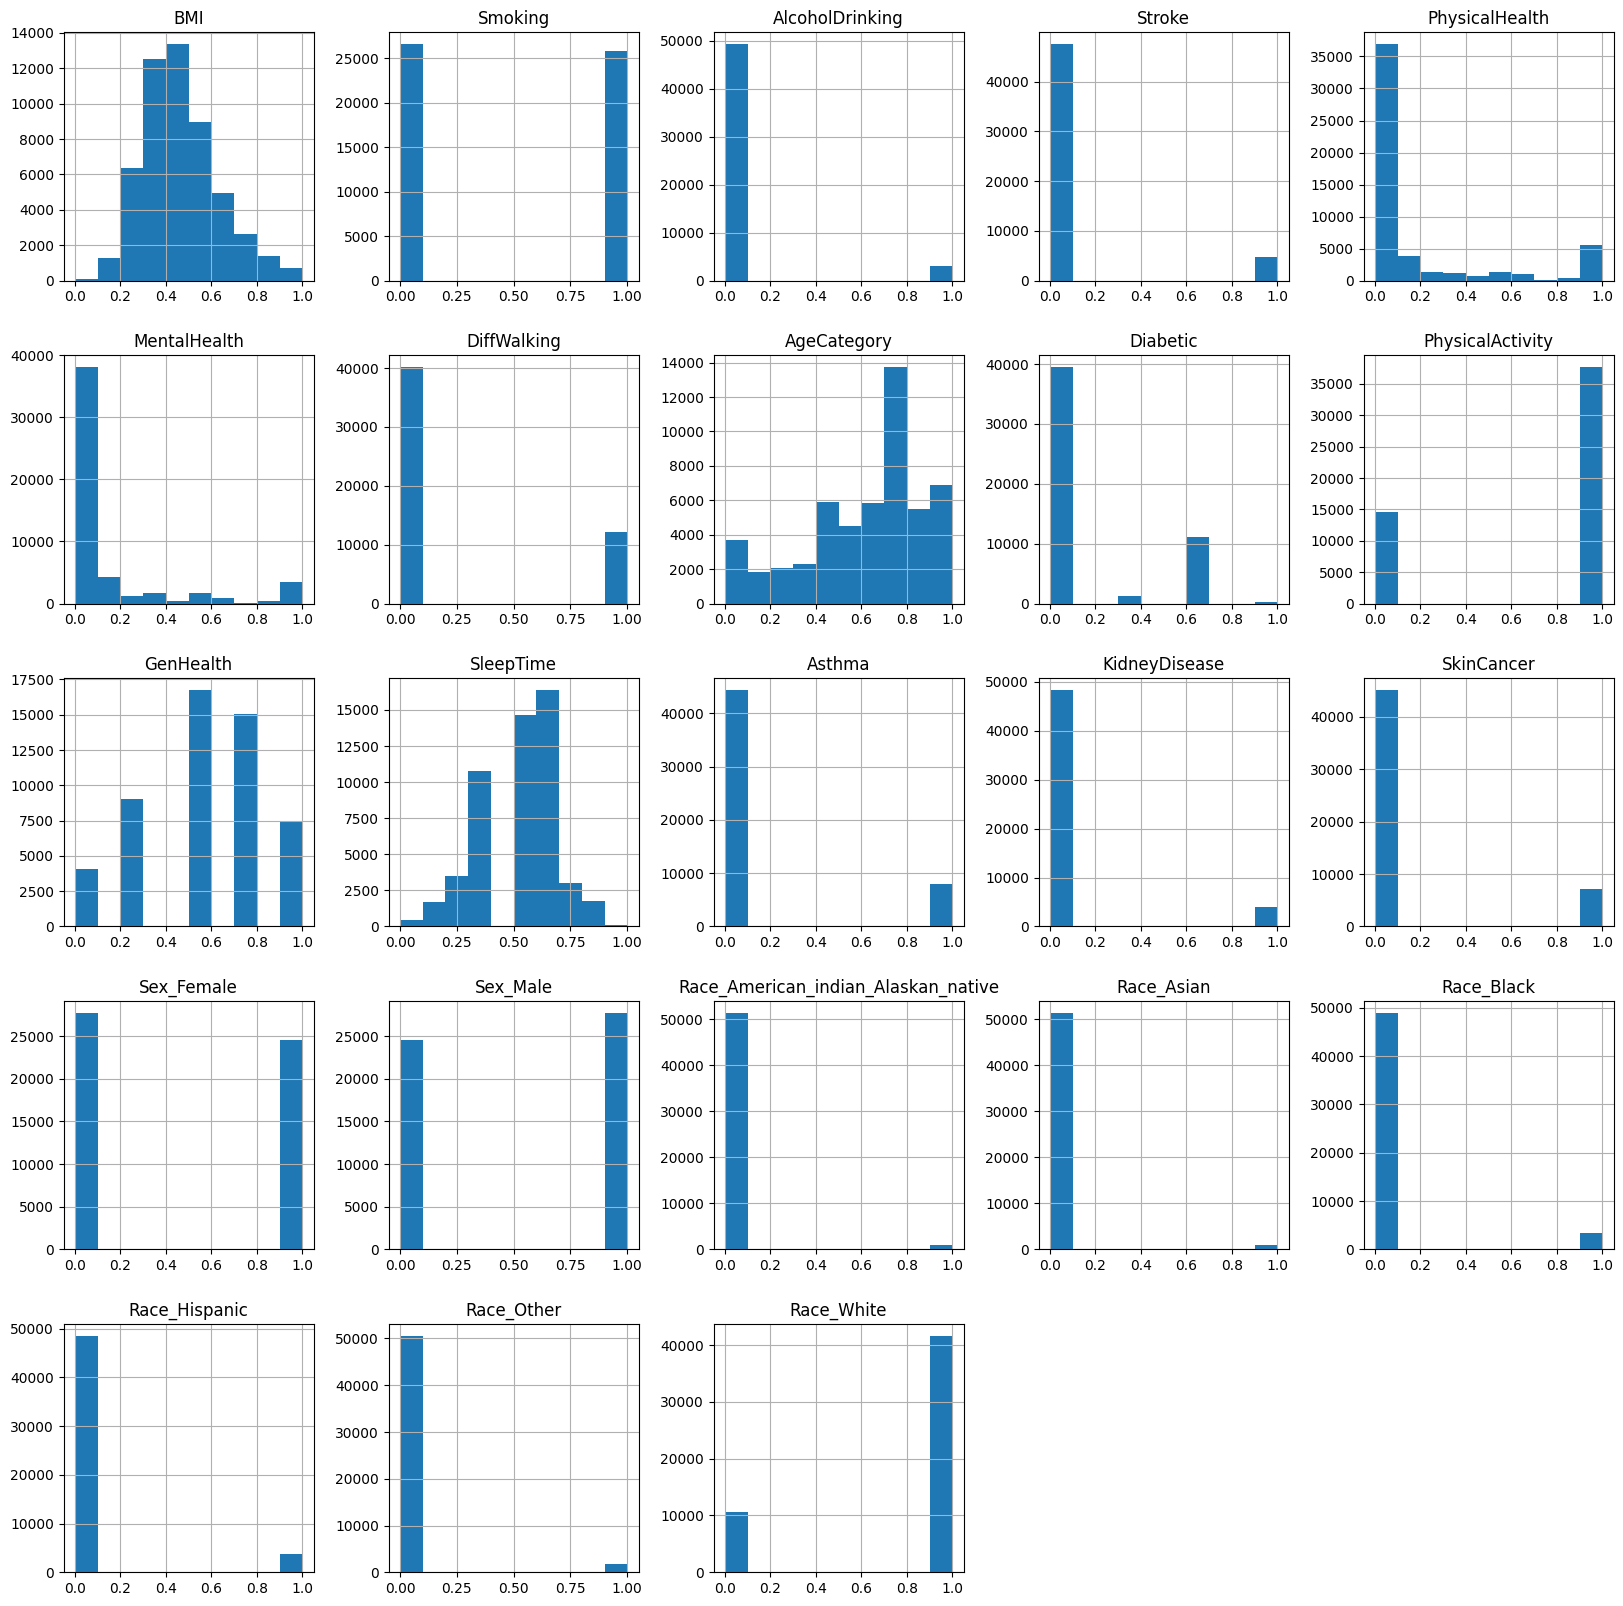

In [41]:
df_normalized.hist(figsize=(20, 20))

# Split into Training and Testing

In [42]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_normalized, test_size=0.2, random_state=42)
df_normalized.to_csv('../data/processed/preprocessed_data.csv', index=False)

train_df.to_csv('../data/processed/train_data.csv', index=False)
test_df.to_csv('../data/processed/test_data.csv', index=False)


# Apply filters

## Univariate

In [43]:
gain_ratio_data = pd.DataFrame({'P-value': [0.089254, 0.075529, 0.064172, 0.055144, 0.054879, 0.045968, 0.027096, 0.025662, 0.024353, 0.02312, 0.021935, 0.012032, 0.012032, 0.011029, 0.010287, 0.006065, 0.004729, 0.004313, 0.004211, 0.004116, 0.001071, 0.000667, 0, 0],
        'Column': ['Stroke', 'DiffWalking', 'KidneyDisease', 'Diabetic', 'GenHealth', 'AgeCategory', 'PhysicalHealth', 'Smoking', 'SkinCancer', 'Race_Asian', 'PhysicalActivity', 'Sex_Male', 'Sex_Female',' Race_Hispanic', ' AlcoholDrinking', ' Race_White', ' SleepTime', ' MentalHealth', ' Asthma', ' BMI', ' Race_American_indian_Alaskan_native', ' Race_Black', ' Race_Other', 'Select']})

def univariate_filter(gain_ratio_data, p_value):
    filtered_df = gain_ratio_data[gain_ratio_data['P-value'] >= p_value]
    selected_columns = filtered_df['Column']
    return selected_columns

p_value_threshold = 0.04
selected_columns = univariate_filter(gain_ratio_data, p_value_threshold)
selected_columns = pd.concat([selected_columns, pd.Series(['HeartDisease'])])
print(selected_columns)

univ_train_df = train_df[selected_columns]
univ_test_df = test_df[selected_columns]

univ_train_df.to_csv('../data/processed/univ_train_data.csv', index=False)
univ_test_df.to_csv('../data/processed/univ_test_data.csv', index=False)

0           Stroke
1      DiffWalking
2    KidneyDisease
3         Diabetic
4        GenHealth
5      AgeCategory
0     HeartDisease
dtype: object


## Multivariate

In [44]:
selected_variables = ['Smoking', 'Stroke', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth', 'KidneyDisease', 'Sex_Female', 'Race_Asian']
selected_columns = selected_variables + ['HeartDisease']
print(selected_columns)

multi_train_df = train_df[selected_columns]
multi_test_df = test_df[selected_columns]

multi_train_df.to_csv('../data/processed/multi_train_data.csv', index=False)
multi_test_df.to_csv('../data/processed/multi_test_data.csv', index=False)

['Smoking', 'Stroke', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth', 'KidneyDisease', 'Sex_Female', 'Race_Asian', 'HeartDisease']


## Wrapper

In [45]:
# Takes ages to run in Weka due to the huge amount of samples so I will reduce it just for the feature selection
dataset_size = len(train_df)
sample_size = 5000

random_smaller_sample = train_df.sample(n=sample_size, random_state=42)

random_smaller_sample.to_csv('../data/processed/random_smaller_sample.csv', index=False)

In [46]:
# Using Weka results:
KNN = ['BMI', 'Smoking', 'MentalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth', 'SleepTime', 'SkinCancer', 'Sex_Female']
RIPPER = ['AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'AgeCategory', 'Diabetic', 'GenHealth', 'Sex_Female', 'Race_White']
SVM = ['AlcoholDrinking', 'Stroke', 'MentalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'SkinCancer', 'Sex_Female', 'Race_Asian']
ANN = ['AlcoholDrinking', 'Stroke', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth', 'Sex_Female', 'Race_White']
TREE = ['BMI', 'Smoking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth', 'SleepTime', 'SkinCancer', 'Sex_Female', 'Race_Asian', 'Race_Black', 'Race_White']

In [47]:
def save_selected_data(algorithm, selected_columns, train_df, test_df):
    train_output_path = f'../data/processed/wrapper/{algorithm.lower()}_train_data.csv'
    test_output_path = f'../data/processed/wrapper/{algorithm.lower()}_test_data.csv'

    selected_columns += ['HeartDisease']
    train_subset = train_df[selected_columns]
    test_subset = test_df[selected_columns]

    train_subset.to_csv(train_output_path, index=False)
    test_subset.to_csv(test_output_path, index=False)

In [48]:
save_selected_data('KNN', KNN, train_df, test_df)
save_selected_data('RIPPER', RIPPER, train_df, test_df)
save_selected_data('SVM', SVM, train_df, test_df)
save_selected_data('ANN', ANN, train_df, test_df)
save_selected_data('TREE', TREE, train_df, test_df)

In [49]:
Wrapper_logistic = ['AlcoholDrinking', 'Stroke', 'AgeCategory', 'GenHealth', 'Asthma', 'SkinCancer']
Wrapper_TAN = ['Smoking', 'Stroke', 'PhysicalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth', 'KidneyDisease', 'SkinCancer', 'Sex_Female', 'Race_Asian', 'Race_White']
Wrapper_LDA = ['AlcoholDrinking', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SkinCancer', 'Sex_Female', 'Race_Asian']
Wrapper_Boosting_TAM = ['Smoking', 'Stroke', 'PhysicalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth', 'KidneyDisease', 'SkinCancer', 'Sex_Female', 'Race_Asian', 'Race_White']
Wrapper_Boosting_logistic = ['AlcoholDrinking', 'Stroke', 'AgeCategory', 'GenHealth', 'Asthma', 'SkinCancer']
Wrapper_Boosting_LDA = ['AlcoholDrinking', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SkinCancer', 'Sex_Female', 'Race_Asian']
Wrapper_Bagging_TAN = ['BMI', 'Stroke', 'MentalHealth', 'AgeCategory', 'Diabetic', 'GenHealth', 'SleepTime', 'SkinCancer', 'Sex_Female', 'Race_Asian', 'Race_White']
Wrapper_Bagging_logistic = ['Smoking', 'Stroke', 'AgeCategory', 'Diabetic', 'GenHealth', 'SkinCancer', 'Sex_Female', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_White']
Wrapper_Bagging_LDA = ['AlcoholDrinking', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'Sex_Female', 'Race_American_indian_Alaskan_native', 'Race_Asian']

In [50]:
algorithms = {
    "Wrapper_logistic": Wrapper_logistic,
    "Wrapper_TAN": Wrapper_TAN,
    "Wrapper_LDA": Wrapper_LDA,
    "Wrapper_Boosting_TAM": Wrapper_Boosting_TAM,
    "Wrapper_Boosting_logistic": Wrapper_Boosting_logistic,
    "Wrapper_Boosting_LDA": Wrapper_Boosting_LDA,
    "Wrapper_Bagging_TAN": Wrapper_Bagging_TAN,
    "Wrapper_Bagging_logistic": Wrapper_Bagging_logistic,
    "Wrapper_Bagging_LDA": Wrapper_Bagging_LDA
}

for algorithm, selected_columns in algorithms.items():
    save_selected_data(algorithm, selected_columns, train_df, test_df)